
<br> Linkedin: [Alisson Oliveira](https://www.linkedin.com/in/alissonfranclin/)

## 1. Otimização Clássica do Risco Médio

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
import riskfolio as rp

warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.4%}'.format

# Periodo 
start = '2020-01-01'
end = '2024-10-01'

# Lista com 15 ativos do IBOVESPA
assets = ['ABEV3.SA', 'BBAS3.SA', 'BBDC4.SA', 'BPAC11.SA', 'BRFS3.SA', 
          'B3SA3.SA', 'CSNA3.SA', 'EQTL3.SA', 'GGBR4.SA', 'ITUB4.SA', 
          'PETR4.SA', 'VALE3.SA', 'WEGE3.SA', 'LREN3.SA', 'RENT3.SA']

# Ordenando a lista de ativos
assets.sort()

# Download dos dados
data = yf.download(assets, start=start, end=end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets


[*********************100%***********************]  15 of 15 completed


In [2]:
# Calculando os retorno
Y = data[assets].pct_change().dropna()
display(Y.head())

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,BRFS3.SA,CSNA3.SA,EQTL3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RENT3.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,,,,,,,,,
2020-01-03 00:00:00+00:00,-1.4063%,-2.8818%,-0.1673%,0.0506%,0.2902%,0.1672%,-0.7488%,-1.1889%,-1.6378%,-1.0518%,-0.6957%,-0.8143%,-1.4510%,-0.7363%,-1.2770%
2020-01-06 00:00:00+00:00,0.4754%,-0.9587%,-1.3219%,-1.7862%,-0.1447%,-1.0295%,-2.4691%,0.1289%,-0.2449%,-1.4882%,-0.0876%,1.1823%,-1.1657%,-0.5934%,0.2587%
2020-01-07 00:00:00+00:00,0.2103%,3.2266%,-0.7547%,-1.7372%,0.3990%,-1.1527%,0.0000%,-0.5150%,1.5709%,-2.3199%,-0.0526%,-0.3895%,0.9725%,0.7275%,0.7741%
2020-01-08 00:00:00+00:00,-0.4722%,-0.2679%,-0.9126%,-1.5469%,-0.8863%,3.8396%,-0.1407%,0.6903%,0.3866%,-1.6293%,0.6489%,-0.6191%,-0.4918%,0.0185%,-3.7838%
2020-01-09 00:00:00+00:00,-0.7907%,-0.0448%,-2.0338%,-1.5993%,0.6807%,0.9039%,-1.0563%,1.1996%,-0.5296%,-1.9933%,-0.7667%,-0.3279%,0.5354%,-1.3146%,-1.4784%


## 2. Estimando Portfólios de Média-Variância

### 2.1 Calculando o portfólio que maximiza o índice de Sharpe.

In [3]:
# Construindo o objeto do portfólio
port = rp.Portfolio(returns=Y)

# Calculando o portfólio ideal

# Selecionar o método e estimar os parâmetros de entrada:

method_mu='hist' # Método para estimar os retornos esperados com base em dados históricos.
method_cov='hist' # Método para estimar a matriz de covariância com base em dados históricos.

port.assets_stats(method_mu=method_mu, method_cov=method_cov)

# Estimar o portfólio ideal:

model='Classic' # Pode ser Classic (histórico), BL (Black-Litterman) ou FM (Modelo de Fatores)
rm = 'MV' # Medida de risco utilizada, neste caso será a variância
obj = 'Sharpe' # Função objetivo, pode ser MinRisk, MaxRet, Utility ou Sharpe
hist = True # Usar cenários históricos para medidas de risco que dependem de cenários
rf = 0 # Taxa livre de risco
l = 0 # Fator de aversão ao risco, útil apenas quando obj é 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)


,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,BRFS3.SA,CSNA3.SA,EQTL3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RENT3.SA,VALE3.SA,WEGE3.SA
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,38.8361%,0.0000%,7.1752%,53.9887%


### 2.2 Plotando a composição do portfólio

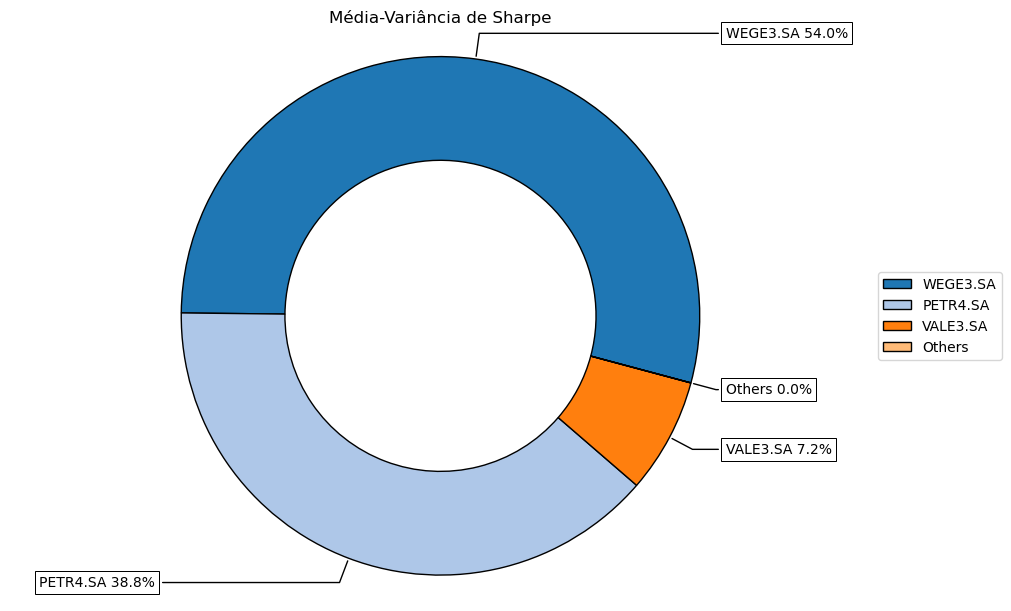

In [4]:
# Plotando a composição do portfólio
ax = rp.plot_pie(w=w, title='Média-Variância de Sharpe', others=0.05, nrow=25, cmap="tab20",
                 height=6, width=10, ax=None)


### 2.3 Calcula a fronteira eficiente

In [5]:
points = 100 # Número de pontos da fronteira
frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)
display(frontier.T.head())


,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,BRFS3.SA,CSNA3.SA,EQTL3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RENT3.SA,VALE3.SA,WEGE3.SA
0,30.4491%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,27.1725%,0.0000%,11.4367%,0.0000%,0.0000%,0.0000%,19.2913%,11.6504%
1,21.8459%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,27.5911%,0.0000%,10.6414%,0.0000%,0.9283%,0.0000%,20.5232%,18.4701%
2,18.8462%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,27.6469%,0.0000%,9.7141%,0.0000%,2.9289%,0.0000%,20.3540%,20.5099%
3,16.4291%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,27.6922%,0.0000%,8.9670%,0.0000%,4.5401%,0.0000%,20.2182%,22.1534%
4,14.3399%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,27.7313%,0.0000%,8.3214%,0.0000%,5.9322%,0.0000%,20.1009%,23.5743%


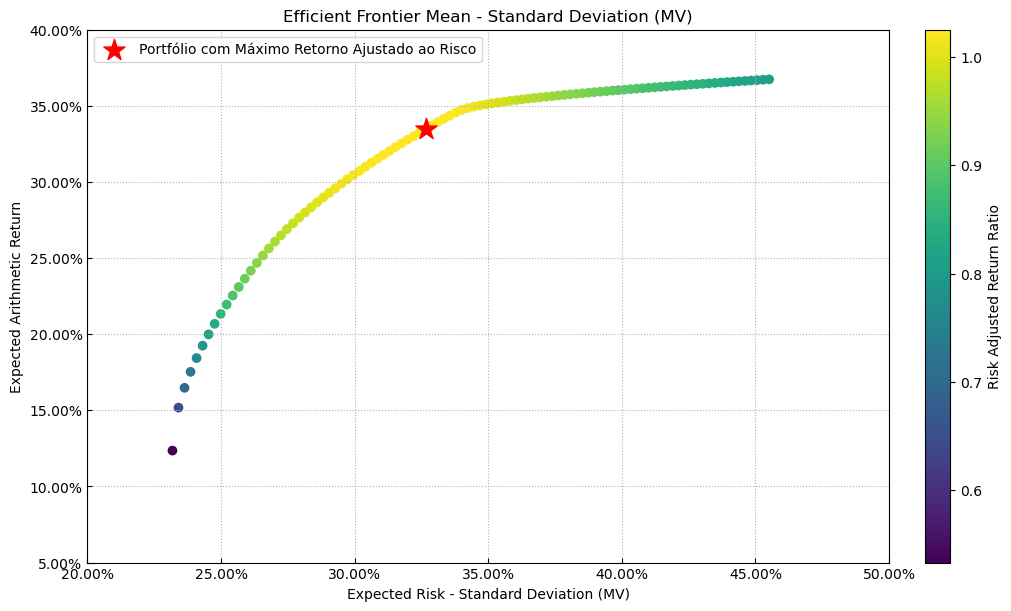

In [6]:
# Plotando a fronteira eficiente

label = 'Portfólio com Máximo Retorno Ajustado ao Risco' # Título do ponto
mu = port.mu # Retornos esperados
cov = port.cov # Matriz de covariância
returns = port.returns # Retornos dos ativos

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


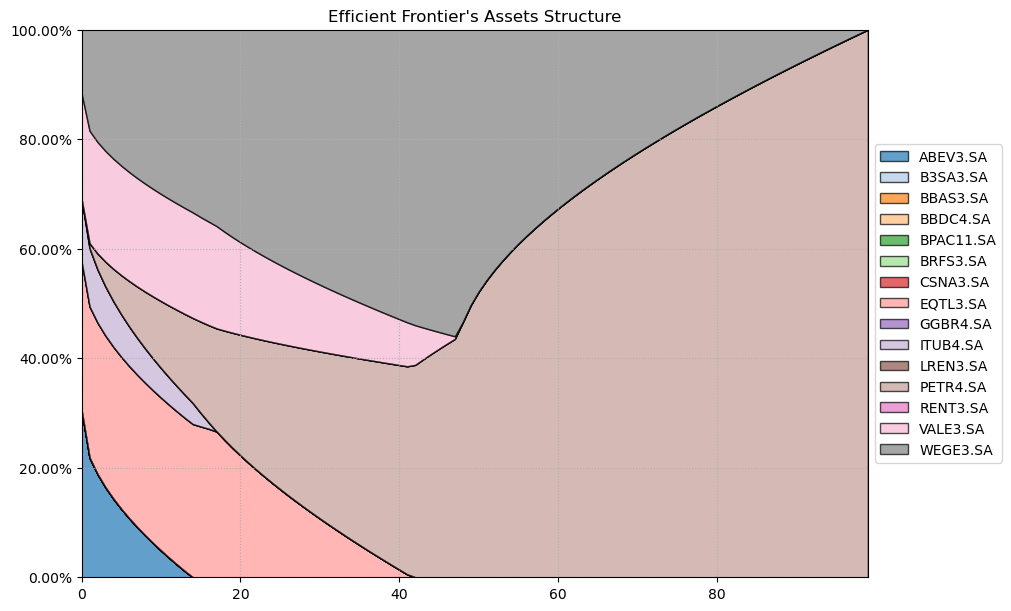

In [7]:
# Plotando a composição da fronteira eficiente
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)


## 3. Estimando Portfólios de Média-Risco

Nesta parte, irei calcular portfólios ótimos para várias medidas de risco. Primeiro, vou calcular o portfólio que maximiza o retorno ajustado ao risco quando o CVaR é a medida de risco; em seguida, vou calcular os portfólios que maximizam o retorno ajustado ao risco para todas as medidas de risco disponíveis.

### 3.1 Calculando o portfólio que maximiza a razão Retorno/CVaR.


In [8]:
rm = 'CVaR' # Medida de risco
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)
display(w.T)


,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,BRFS3.SA,CSNA3.SA,EQTL3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RENT3.SA,VALE3.SA,WEGE3.SA
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,28.1380%,0.0000%,10.2237%,61.6383%


### 3.2 Plotando a composição do portfólio


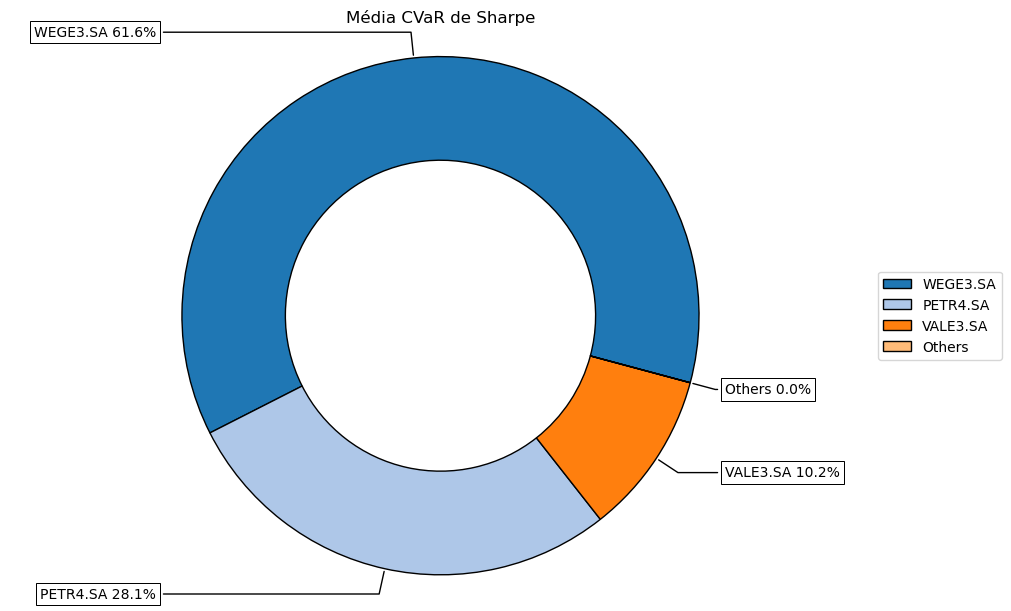

In [9]:
ax = rp.plot_pie(w=w, title='Média CVaR de Sharpe', others=0.05, nrow=25, cmap="tab20",
                 height=6, width=10, ax=None)

### 3.3 Calculate efficient frontier

In [10]:
points = 100 # Número de pontos da fronteira

frontier = port.efficient_frontier(model=model, rm=rm, points=points, rf=rf, hist=hist)

display(frontier.T.head())


,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,BRFS3.SA,CSNA3.SA,EQTL3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RENT3.SA,VALE3.SA,WEGE3.SA
0,32.6639%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,20.8321%,0.0000%,5.2355%,0.0000%,0.0000%,0.0000%,30.4723%,10.7963%
1,24.5046%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,21.3349%,0.0000%,5.4373%,0.0000%,0.0000%,0.0000%,29.2415%,19.4818%
2,18.1290%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,23.1119%,0.0000%,7.1665%,0.0000%,0.6175%,0.0000%,30.1440%,20.8311%
3,15.5370%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,22.7367%,0.0000%,8.2139%,0.0000%,0.4913%,0.0000%,27.3278%,25.6933%
4,14.0132%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,23.2898%,0.0000%,6.0092%,0.0000%,1.4968%,0.0000%,27.8670%,27.3240%


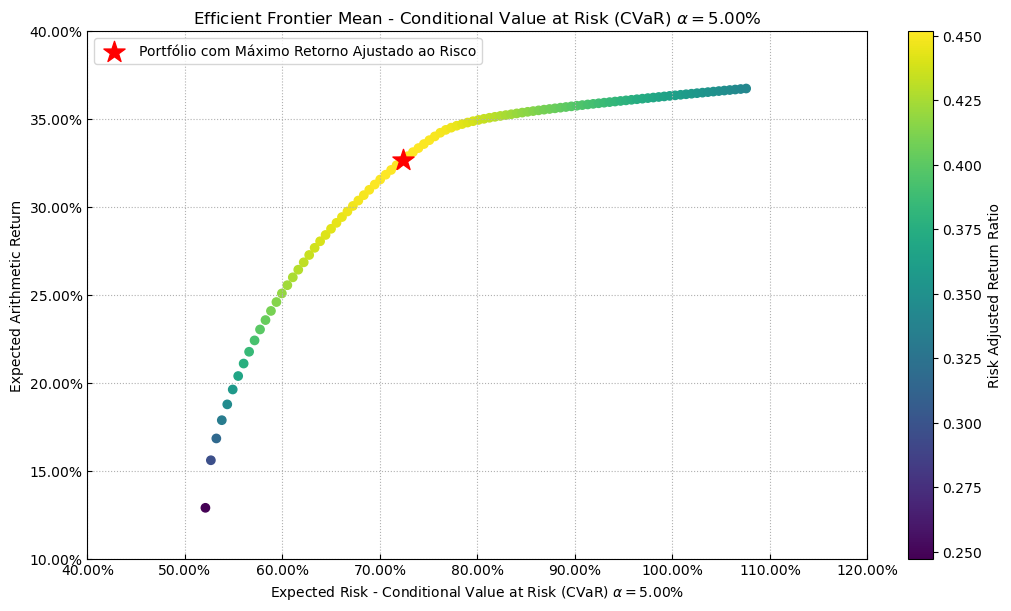

In [11]:
label = 'Portfólio com Máximo Retorno Ajustado ao Risco' # Título do ponto

ax = rp.plot_frontier(w_frontier=frontier, mu=mu, cov=cov, returns=returns, rm=rm,
                      rf=rf, alpha=0.05, cmap='viridis', w=w, label=label,
                      marker='*', s=16, c='r', height=6, width=10, ax=None)


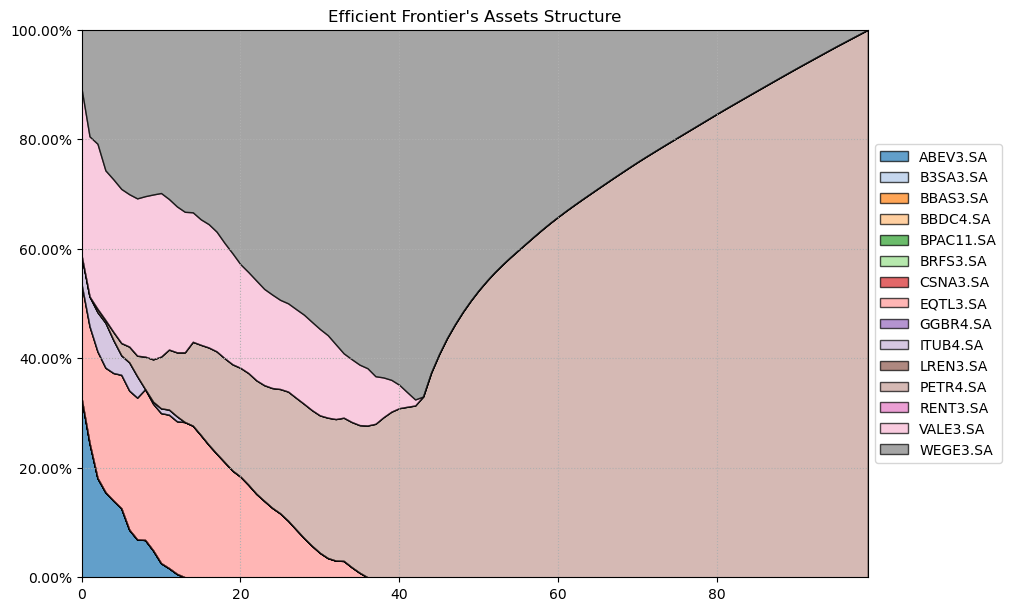

In [12]:
# Plotando a composição da fronteira eficiente
ax = rp.plot_frontier_area(w_frontier=frontier, cmap="tab20", height=6, width=10, ax=None)


### 3.4 Calcular Portfólios Ótimos para Várias Medidas de Risco


In [13]:
# Medidas de Risco disponíveis:
#
# 'MV': Desvio Padrão.
# 'MAD': Desvio Absoluto Médio.
# 'MSV': Desvio Padrão Semi.
# 'FLPM': Primeiro Momento Parcial Inferior (Razão de Omega).
# 'SLPM': Segundo Momento Parcial Inferior (Razão de Sortino).
# 'CVaR': Valor em Risco Condicional.
# 'EVaR': Valor em Risco Entropico.
# 'WR': Pior Realização (Minimax)
# 'MDD': Máxima Queda de retornos cumulativos não compostos (Razão de Calmar).
# 'ADD': Queda Média de retornos cumulativos não compostos.
# 'CDaR': Queda Condicional em Risco de retornos cumulativos não compostos.
# 'EDaR': Queda Entropica em Risco de retornos cumulativos não compostos.
# 'UCI': Índice de Úlcera de retornos cumulativos não compostos.

rms = ['MV', 'MAD', 'MSV', 'FLPM', 'SLPM', 'CVaR',
       'EVaR', 'WR', 'MDD', 'ADD', 'CDaR', 'UCI', 'EDaR']

w_s = pd.DataFrame([])

for i in rms:
    w = port.optimization(model=model, rm=i, obj=obj, rf=rf, l=l, hist=hist)
    w_s = pd.concat([w_s, w], axis=1)
    
w_s.columns = rms

In [14]:
w_s.style.format("{:.2%}").background_gradient(cmap='YlGn')

,MV,MAD,MSV,FLPM,SLPM,CVaR,EVaR,WR,MDD,ADD,CDaR,UCI,EDaR
ABEV3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
B3SA3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BBAS3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BBDC4.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
BPAC11.SA,0.00%,3.12%,0.00%,5.48%,0.00%,0.00%,0.00%,0.00%,0.00%,7.17%,0.00%,0.00%,0.00%
BRFS3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
CSNA3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
EQTL3.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
GGBR4.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
ITUB4.SA,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


<Axes: >

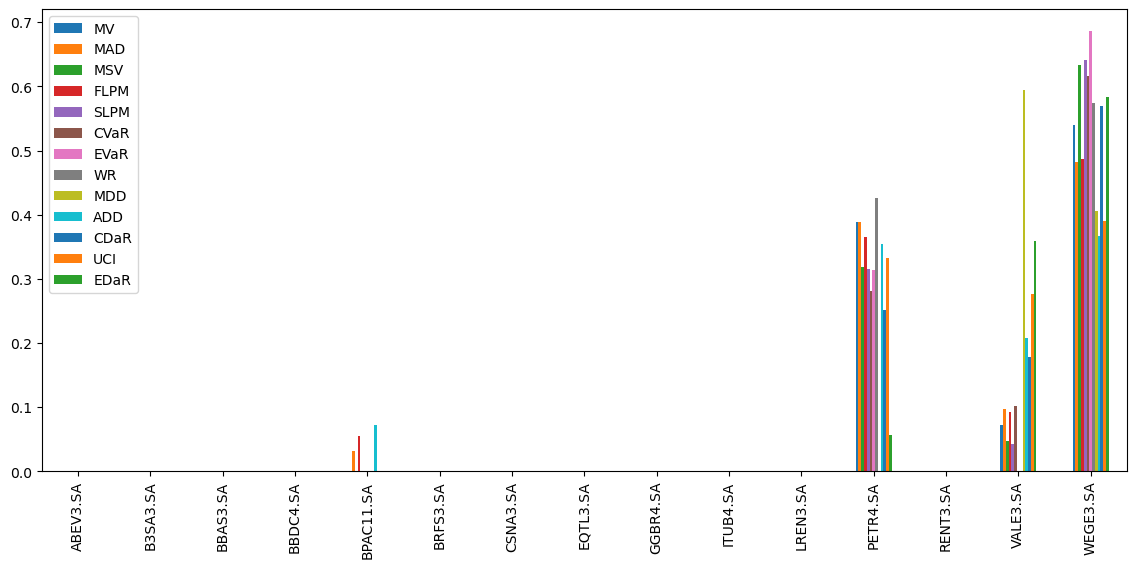

In [15]:
# Plotando uma comparação dos pesos dos ativos para cada portfólio
fig = plt.gcf()
fig.set_figwidth(14)
fig.set_figheight(6)
ax = fig.subplots(nrows=1, ncols=1)

w_s.plot.bar(ax=ax)


## 4. Restrições sobre Ativos e Classes de Ativos

### 4.1 Criando as restrições

Nesta parte, utilizo dicionários para criar as restrições, mas é preferível criar as tabelas em Excel e carregá-las com pandas.read_excel.


In [16]:
# Classes de ativos com indústrias em português
asset_classes = {'Ativos': ['ABEV3.SA', 'BBAS3.SA', 'BBDC4.SA', 'BPAC11.SA', 'BRFS3.SA',
                            'B3SA3.SA', 'CSNA3.SA', 'EQTL3.SA', 'GGBR4.SA', 'ITUB4.SA',
                            'PETR4.SA', 'VALE3.SA', 'WEGE3.SA', 'LREN3.SA', 'RENT3.SA'], 
                 'Indústria': ['Bens de Consumo', 'Financeiro', 'Financeiro',
                               'Financeiro', 'Bens de Consumo', 'Materiais',
                               'Materiais', 'Utilidades', 'Materiais', 'Financeiro',
                               'Energia', 'Materiais', 'Industriais', 'Consumo Discricionário',
                               'Consumo Discricionário']}


# Transformando em DataFrame e ordenando por ativos
asset_classes = pd.DataFrame(asset_classes)
asset_classes = asset_classes.sort_values(by=['Ativos'])

# Restrições sobre os ativos e classes de ativos
restricoes = {'Desativado': [False, False, False, False, False],
              'Tipo': ['Todos os Ativos', 'Classes', 'Classes', 'Classes', 'Classes'],
              'Conjunto': ['', 'Indústria', 'Indústria', 'Indústria', 'Indústria'],
              'Posição': ['', 'Financeiro', 'Materiais', 'Consumo Discricionário', 'Bens de Consumo'],
              'Sinal': ['<=', '<=', '<=', '<=', '<='],
              'Peso': [0.10, 0.2, 0.2, 0.2, 0.2],
              'Tipo Relativo': ['', '', '', '', ''],
              'Conjunto Relativo': ['', '', '', '', ''],
              'Relativo': ['', '', '', '', ''],
              'Fator': ['', '', '', '', '']}

restricoes = pd.DataFrame(restricoes)

display(restricoes)


,Desativado,Tipo,Conjunto,Posição,Sinal,Peso,Tipo Relativo,Conjunto Relativo,Relativo,Fator
0,False,Todos os Ativos,,,<=,10.0000%,,,,
1,False,Classes,Indústria,Financeiro,<=,20.0000%,,,,
2,False,Classes,Indústria,Materiais,<=,20.0000%,,,,
3,False,Classes,Indústria,Consumo Discricionário,<=,20.0000%,,,,
4,False,Classes,Indústria,Bens de Consumo,<=,20.0000%,,,,


In [17]:
A, B = rp.assets_constraints(restricoes, asset_classes)

### 4.2 Otimizar o portfólio com as restrições


In [18]:
port.ainequality = A
port.binequality = B

model = 'Classic'
rm = 'MV'
obj = 'Sharpe'
rf = 0

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,ABEV3.SA,B3SA3.SA,BBAS3.SA,BBDC4.SA,BPAC11.SA,BRFS3.SA,CSNA3.SA,EQTL3.SA,GGBR4.SA,ITUB4.SA,LREN3.SA,PETR4.SA,RENT3.SA,VALE3.SA,WEGE3.SA
weights,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,38.8361%,0.0000%,7.1753%,53.9887%


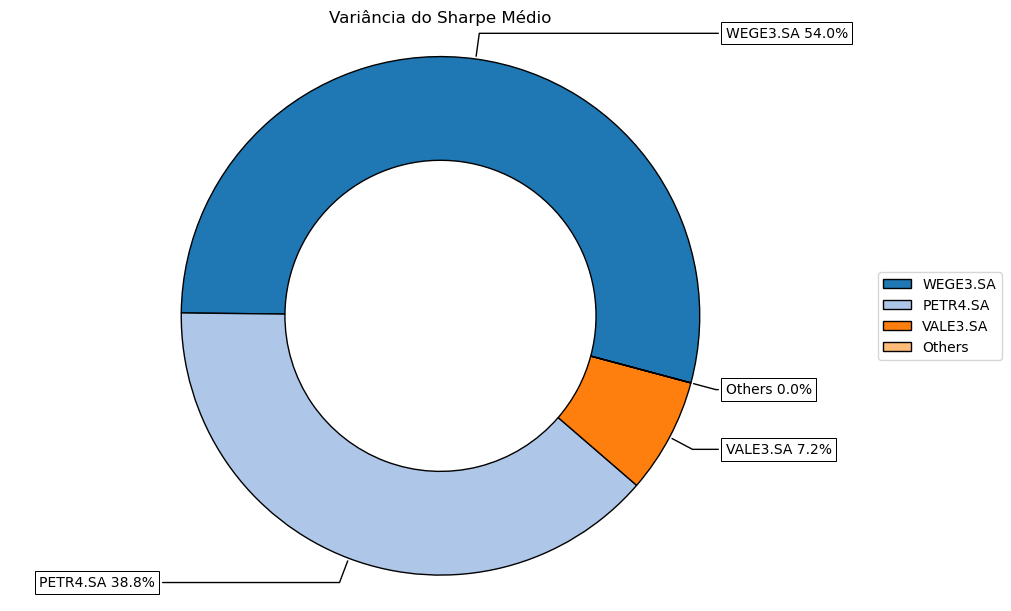

In [19]:
ax = rp.plot_pie(w=w, title='Variância do Sharpe Médio', others=0.05, nrow=25, cmap="tab20",
                 height=6, width=10, ax=None)


In [20]:
w_classes = pd.concat([asset_classes.set_index('Ativos'), w], axis=1)
display(w_classes)

,Indústria,weights
ABEV3.SA,Bens de Consumo,0.0000%
B3SA3.SA,Materiais,0.0000%
BBAS3.SA,Financeiro,0.0000%
BBDC4.SA,Financeiro,0.0000%
BPAC11.SA,Financeiro,0.0000%
BRFS3.SA,Bens de Consumo,0.0000%
CSNA3.SA,Materiais,0.0000%
EQTL3.SA,Utilidades,0.0000%
GGBR4.SA,Materiais,0.0000%
ITUB4.SA,Financeiro,0.0000%


In [21]:
w_classes = w_classes.groupby(['Indústria']).sum()
display(w_classes)

,weights
Indústria,
Bens de Consumo,0.0000%
Consumo Discricionário,0.0000%
Energia,38.8361%
Financeiro,0.0000%
Industriais,53.9887%
Materiais,7.1753%
Utilidades,0.0000%


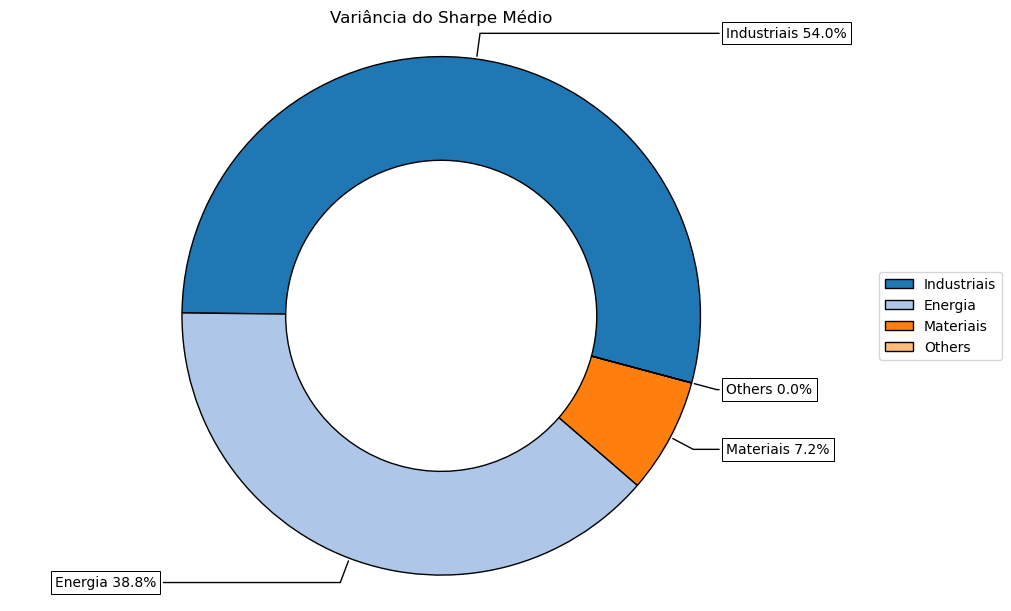

In [22]:
ax = rp.plot_pie(w=w_classes, title='Variância do Sharpe Médio', others=0.05, nrow=25,
                 cmap = "tab20", height=6, width=10, ax=None)

In [23]:
#Fim!